In [1]:
import nltk
from nltk.stem import PorterStemmer,SnowballStemmer,regexp
from nltk.tokenize import TweetTokenizer,word_tokenize
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import seaborn as sns
warnings.filterwarnings('ignore')

### Paths Of Attachments

In [2]:
SKULL_IMAGE_PATH='skull-icon.png'

In [3]:
raw_data=pd.read_csv('Tweeter_Data_In.csv')

In [4]:
raw_data.head(n=5)

,created_at,hashtags,favorite_count,id,lang,place,retweet_count,text,tweet_url,user_screen_name,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count
0,Wed Mar 25 06:20:02 +0000 2020,NaN,0,1242697733175220000,en,"Pune, India",0,Meditation and mindfulness tips for coping wit...,https://twitter.com/ShalomFloat/status/1242697...,ShalomFloat,Shalom float spa is the first dedicated float ...,252,382,97,24,India,Shalom Float Spa,ShalomFloat,1770
1,Wed Mar 25 06:36:25 +0000 2020,NaN,0,1242701857253980000,en,"Gandhinagar, India",0,Contribute to INDIA FIGHTS CORONA @ Gandhinaga...,https://twitter.com/prakashkalal/status/124270...,prakashkalal,NaN,693,175,107,0,"Gandhinagar, India",prks7,prakashkalal,73
2,Wed Mar 25 06:18:32 +0000 2020,NaN,0,1242697356249880000,en,"Bidhan Nagar, India",0,@DelhiPolice @DCPEastDelhi @msisodia @AamAadmi...,https://twitter.com/Bhartendulkar/status/12426...,Bhartendulkar,Senior Media Analyst @Indianpac | Ex Sr Report...,5273,609,2239,7,"Kolkata, India",Bhartendu Sharma,Bhartendulkar,6002
3,Wed Mar 25 06:05:46 +0000 2020,SSC_UFM_MAT_KARONA Corona UFM,9,1242694142242650000,en,"Maharashtra, India",19,#SSC_UFM_MAT_KARONA\n#Corona is slow poison #U...,https://twitter.com/patilkiii/status/124269414...,patilkiii,"Ab khushi de ke aazma le khuda, In ghamon se t...",1744,259,786,0,"Pune, India",ùï¨ùñáùñçùñéùñëùñÜùñòùñç ùïæùñöùñì...,patilkiii,1387
4,Wed Mar 25 06:31:10 +0000 2020,Corona pritamkumarmurari Voice,0,1242700536752700000,en,"Bokaro Steel City, India",0,https://t.co/P7eQiq8tFa Mata Di \nDoston ise #...,https://twitter.com/SINGERMurariPa1/status/124...,SINGERMurariPa1,"Singing,Dancing,Acting,Entertainment",4,2,163,0,‡§¨‡•ã‡§ï‡§æ‡§∞‡•ã ‡§∏‡•ç‡§ü‡•Ä‡§≤ ‡§∏‡§ø‡§ü‡•...,SINGER=Murari Pathak,SINGERMurariPa1,13


In [5]:
raw_data.describe()

,favorite_count,id,retweet_count,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_statuses_count
count,44179.000000,4.417900e+04,44179.000000,44179.000000,4.417900e+04,44179.000000,44179.000000,4.417900e+04
mean,8.688834,1.249746e+18,2.037122,15413.078906,6.076601e+03,908.844723,15.648951,1.830381e+04
std,690.196275,5.513385e+15,110.332251,42971.397214,1.494865e+05,5802.053827,86.748546,5.619829e+04
min,0.000000,1.242693e+18,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000e+00
25%,0.000000,1.244130e+18,0.000000,233.000000,3.400000e+01,98.000000,0.000000,3.990000e+02
50%,0.000000,1.250482e+18,0.000000,2192.000000,1.750000e+02,293.000000,0.000000,2.476000e+03
75%,1.000000,1.256266e+18,0.000000,11439.000000,8.890000e+02,843.000000,5.000000,1.330600e+04
max,144012.000000,1.258242e+18,22549.000000,638151.000000,1.827721e+07,316697.000000,5775.000000,2.117851e+06


In [6]:
raw_data.isnull().any()

created_at               False
hashtags                  True
favorite_count           False
id                       False
lang                     False
place                     True
retweet_count            False
text                     False
tweet_url                False
user_screen_name         False
user_description          True
user_favourites_count    False
user_followers_count     False
user_friends_count       False
user_listed_count        False
user_location             True
user_name                 True
user_screen_name.1       False
user_statuses_count      False
dtype: bool

In [7]:
raw_data[raw_data.user_name.isnull()==True]['user_name']='Nitin Kalal'# As the screen name of these 3 enteries is NitinKalalNC

In [8]:
raw_data[raw_data.place.isnull()==True]  #17 enteries with no place mentioned

,created_at,hashtags,favorite_count,id,lang,place,retweet_count,text,tweet_url,user_screen_name,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count
6820,Fri Mar 27 15:44:13 +0000 2020,NaN,28,1243564491293560000,en,NaN,1,Perhaps because he was caught spreading fake n...,https://twitter.com/gunjakapoor/status/1243564...,gunjakapoor,"I was innocent, then life happened... \nLuckno...",27821,37649,2327,84,Lucknow,GeeKay,gunjakapoor,38038
16442,Wed Apr 01 03:55:44 +0000 2020,TablighiJamaat,1321,1245198132272680000,en,NaN,444,Enough said!\n\nVaishno Devi Mandir - doors se...,https://twitter.com/gunjakapoor/status/1245198...,gunjakapoor,"I was innocent, then life happened... \nLuckno...",27821,37649,2327,84,Lucknow,GeeKay,gunjakapoor,38038
19477,Tue Apr 14 06:17:40 +0000 2020,ShameonTwitterIndia,6,1249944896577740000,en,NaN,11,Just as all the scientific resources have fail...,https://twitter.com/sarswat_suresh/status/1249...,sarswat_suresh,‡•§‡•§ ‡§Ö‡§π‡§Ç‡§ï‡§æ‡§∞ ‡§≠‡•Ä ‡§Ü‡§µ‡§∂‡•ç‡...,13831,1272,1207,0,‡§≠‡§æ‡§∞‡§§‡§µ‡§∞‡•ç‡§∑,Suresh Sarswat,sarswat_suresh,8944
19593,Tue Apr 14 07:00:43 +0000 2020,ShameonTwitterIndia,4,1249955730779540000,en,NaN,3,Double standard @TwitterIndia @jack we will no...,https://twitter.com/sarswat_suresh/status/1249...,sarswat_suresh,‡•§‡•§ ‡§Ö‡§π‡§Ç‡§ï‡§æ‡§∞ ‡§≠‡•Ä ‡§Ü‡§µ‡§∂‡•ç‡...,13831,1272,1207,0,‡§≠‡§æ‡§∞‡§§‡§µ‡§∞‡•ç‡§∑,Suresh Sarswat,sarswat_suresh,8944
23549,Thu Apr 16 15:32:02 +0000 2020,NaN,0,1250809181294270000,en,NaN,0,"@INCIndia @RahulGandhi Rahulji, pls understand...",https://twitter.com/RRUHAINY/status/1250809181...,RRUHAINY,"B. com, Bombay University & LLB. Bombay Univer...",9119,2864,3843,0,"Mumbai, India",Ruhainy Desai,RRUHAINY,10227
24534,Fri Apr 17 10:21:29 +0000 2020,NaN,0,1251093418954170000,en,NaN,0,"@INCIndia AaRreeee, u don't know? Now corona h...",https://twitter.com/RRUHAINY/status/1251093418...,RRUHAINY,"B. com, Bombay University & LLB. Bombay Univer...",9119,2864,3843,0,"Mumbai, India",Ruhainy Desai,RRUHAINY,10227
25977,Sat Apr 18 08:05:51 +0000 2020,NaN,0,1251421671304480000,en,NaN,0,@INCSandesh @INCIndia Oh ! So now you are offi...,https://twitter.com/RRUHAINY/status/1251421671...,RRUHAINY,"B. com, Bombay University & LLB. Bombay Univer...",9119,2864,3843,0,"Mumbai, India",Ruhainy Desai,RRUHAINY,10227
26417,Sat Apr 18 10:20:54 +0000 2020,NaN,0,1251455659695990000,en,NaN,0,@alkagurha Here you go:\nhttps://t.co/5THiXj59dk,https://twitter.com/thedarkangel021/status/125...,thedarkangel021,Analyst | Freelance Content Writer | foodie | ...,1324,334,67,11,India,The Dark Angel,thedarkangel021,2422
26452,Sat Apr 18 10:44:05 +0000 2020,NaN,0,1251461493947670000,en,NaN,0,@INCIndia It seems congress looks very happy w...,https://twitter.com/RRUHAINY/status/1251461493...,RRUHAINY,"B. com, Bombay University & LLB. Bombay Univer...",9119,2864,3843,0,"Mumbai, India",Ruhainy Desai,RRUHAINY,10227
26579,Sat Apr 18 11:09:57 +0000 2020,NaN,0,1251468002693760000,en,NaN,0,@INCIndia Destabilize kiya (Congrss in MP) kiu...,https://twitter.com/RRUHAINY/status/1251468002...,RRUHAINY,"B. com, Bombay University & LLB. Bombay Univer...",9119,2864,3843,0,"Mumbai, India",Ruhainy Desai,RRUHAINY,10227


In [9]:
list_places=list(raw_data.place)
places_array=np.array(list_places)
unique_places=np.unique(places_array)
places_df=pd.DataFrame(unique_places)
print(places_df.shape)

(2579, 1)


In [10]:
places_df.head(10)

,0
0,"""L"" Ward Office, Kurla West."
1,"16th main, 17th cross, btm 2nd stage, bangalore"
2,24h
3,"26 Block, west patel nagar"
4,AAIMS
5,AIIMS
6,ANRAK Aluminium factory
7,APMC Market
8,ATS Advantage
9,Aashiana


In [11]:
def clean_tweet(data):
    """
    This function doesn't involve stemming.
    
    """
    m=data.shape[0]
    clean_tweet_list=[]
    clean_tweet_word_list=[]
    #tt=TweetTokenizer()     # Using a word tokenizer but we can use a tweet tokenizer as well.
    stop_words=set(stopwords.words('english'))
    for i in range(m):
        soup=BeautifulSoup(data[i],'html.parser')
        cleaned_text=soup.get_text()
        words=word_tokenize(cleaned_text.lower())
        filter_words_per_tweet=[]
        for word in words:
            if word.isalpha() and word not in stop_words:
                filter_words_per_tweet.append(word)
        clean_tweet_word_list.append(filter_words_per_tweet)
        clean_tweet_str=' '.join(filter_words_per_tweet)
        clean_tweet_list.append(clean_tweet_str)
    return clean_tweet_list,clean_tweet_word_list

In [12]:
def clean_tweet_stemming(data,stemming=True):
    """
    This function involves stemming .
    
    """
    m=data.shape[0]
    clean_tweet_list=[]
    clean_tweet_word_list=[]
    #tt=TweetTokenizer()     # Using a word tokenizer but we can use a tweet tokenizer as well.
    stop_words=set(stopwords.words('english'))
    stemmer=PorterStemmer()
    for i in range(m):
        soup=BeautifulSoup(data[i],'html.parser')
        cleaned_text=soup.get_text()
        words=word_tokenize(cleaned_text.lower())
        filter_words_per_tweet=[]
        for word in words:
            if word.isalpha() and word not in stop_words:
                stemmed_word=stemmer.stem(word)
                filter_words_per_tweet.append(stemmed_word)
        clean_tweet_word_list.append(filter_words_per_tweet)
        clean_tweet_str=' '.join(filter_words_per_tweet)
        clean_tweet_list.append(clean_tweet_str)
    
    return clean_tweet_list, clean_tweet_word_list

In [13]:
test=raw_data.text.head(5)

In [14]:
clean_tweet_list,clean_tweet_word_list=clean_tweet(test)  # Without Stemming of words

In [15]:
clean_tweet_list

['meditation mindfulness tips coping corona virus people become anxious home experts recommend mindfulness meditation practice proven https',
 'contribute india fights corona gandhinagar gujarat https',
 'delhipolice dcpeastdelhi msisodia aamaadmiparty arvindkejriwal sir please send team immediately sanitize building https',
 'corona slow poison ufm instant killer thousands genuine aspirants doptgoi pmoindia drjitendrasingh https',
 'https mata di doston ise corona ke tarah faila bhai please like share comments subscribe channel youtube pritamkumarmurari support voice']

In [16]:
clean_tweet_word_list

[['meditation',
  'mindfulness',
  'tips',
  'coping',
  'corona',
  'virus',
  'people',
  'become',
  'anxious',
  'home',
  'experts',
  'recommend',
  'mindfulness',
  'meditation',
  'practice',
  'proven',
  'https'],
 ['contribute',
  'india',
  'fights',
  'corona',
  'gandhinagar',
  'gujarat',
  'https'],
 ['delhipolice',
  'dcpeastdelhi',
  'msisodia',
  'aamaadmiparty',
  'arvindkejriwal',
  'sir',
  'please',
  'send',
  'team',
  'immediately',
  'sanitize',
  'building',
  'https'],
 ['corona',
  'slow',
  'poison',
  'ufm',
  'instant',
  'killer',
  'thousands',
  'genuine',
  'aspirants',
  'doptgoi',
  'pmoindia',
  'drjitendrasingh',
  'https'],
 ['https',
  'mata',
  'di',
  'doston',
  'ise',
  'corona',
  'ke',
  'tarah',
  'faila',
  'bhai',
  'please',
  'like',
  'share',
  'comments',
  'subscribe',
  'channel',
  'youtube',
  'pritamkumarmurari',
  'support',
  'voice']]

In [17]:
def average_tweet_length(tweet_lists):
    lenghts=[]
    for tweet in tweet_lists:
        lenghts.append(len(tweet))
    average_words=np.sum(lenghts)/len(lenghts)
    return int(average_words),lenghts

In [18]:
avg_tweet_length,lenghts=average_tweet_length(clean_tweet_word_list)

In [19]:
avg_tweet_length,lenghts

(14, [17, 7, 13, 13, 20])

In [20]:
clean_text,clean_words=clean_tweet(raw_data.text) # Without stemming

In [21]:
clean_words

[['meditation',
  'mindfulness',
  'tips',
  'coping',
  'corona',
  'virus',
  'people',
  'become',
  'anxious',
  'home',
  'experts',
  'recommend',
  'mindfulness',
  'meditation',
  'practice',
  'proven',
  'https'],
 ['contribute',
  'india',
  'fights',
  'corona',
  'gandhinagar',
  'gujarat',
  'https'],
 ['delhipolice',
  'dcpeastdelhi',
  'msisodia',
  'aamaadmiparty',
  'arvindkejriwal',
  'sir',
  'please',
  'send',
  'team',
  'immediately',
  'sanitize',
  'building',
  'https'],
 ['corona',
  'slow',
  'poison',
  'ufm',
  'instant',
  'killer',
  'thousands',
  'genuine',
  'aspirants',
  'doptgoi',
  'pmoindia',
  'drjitendrasingh',
  'https'],
 ['https',
  'mata',
  'di',
  'doston',
  'ise',
  'corona',
  'ke',
  'tarah',
  'faila',
  'bhai',
  'please',
  'like',
  'share',
  'comments',
  'subscribe',
  'channel',
  'youtube',
  'pritamkumarmurari',
  'support',
  'voice'],
 ['chintskap', 'mum', 'phd', 'corona', 'virus', 'whatsapp', 'university'],
 ['funnyhammy

In [22]:
avg_tweet_length,lengths=average_tweet_length(clean_words)

In [23]:
avg_tweet_length

15

In [24]:
indices=list(range(raw_data.shape[0]+1))

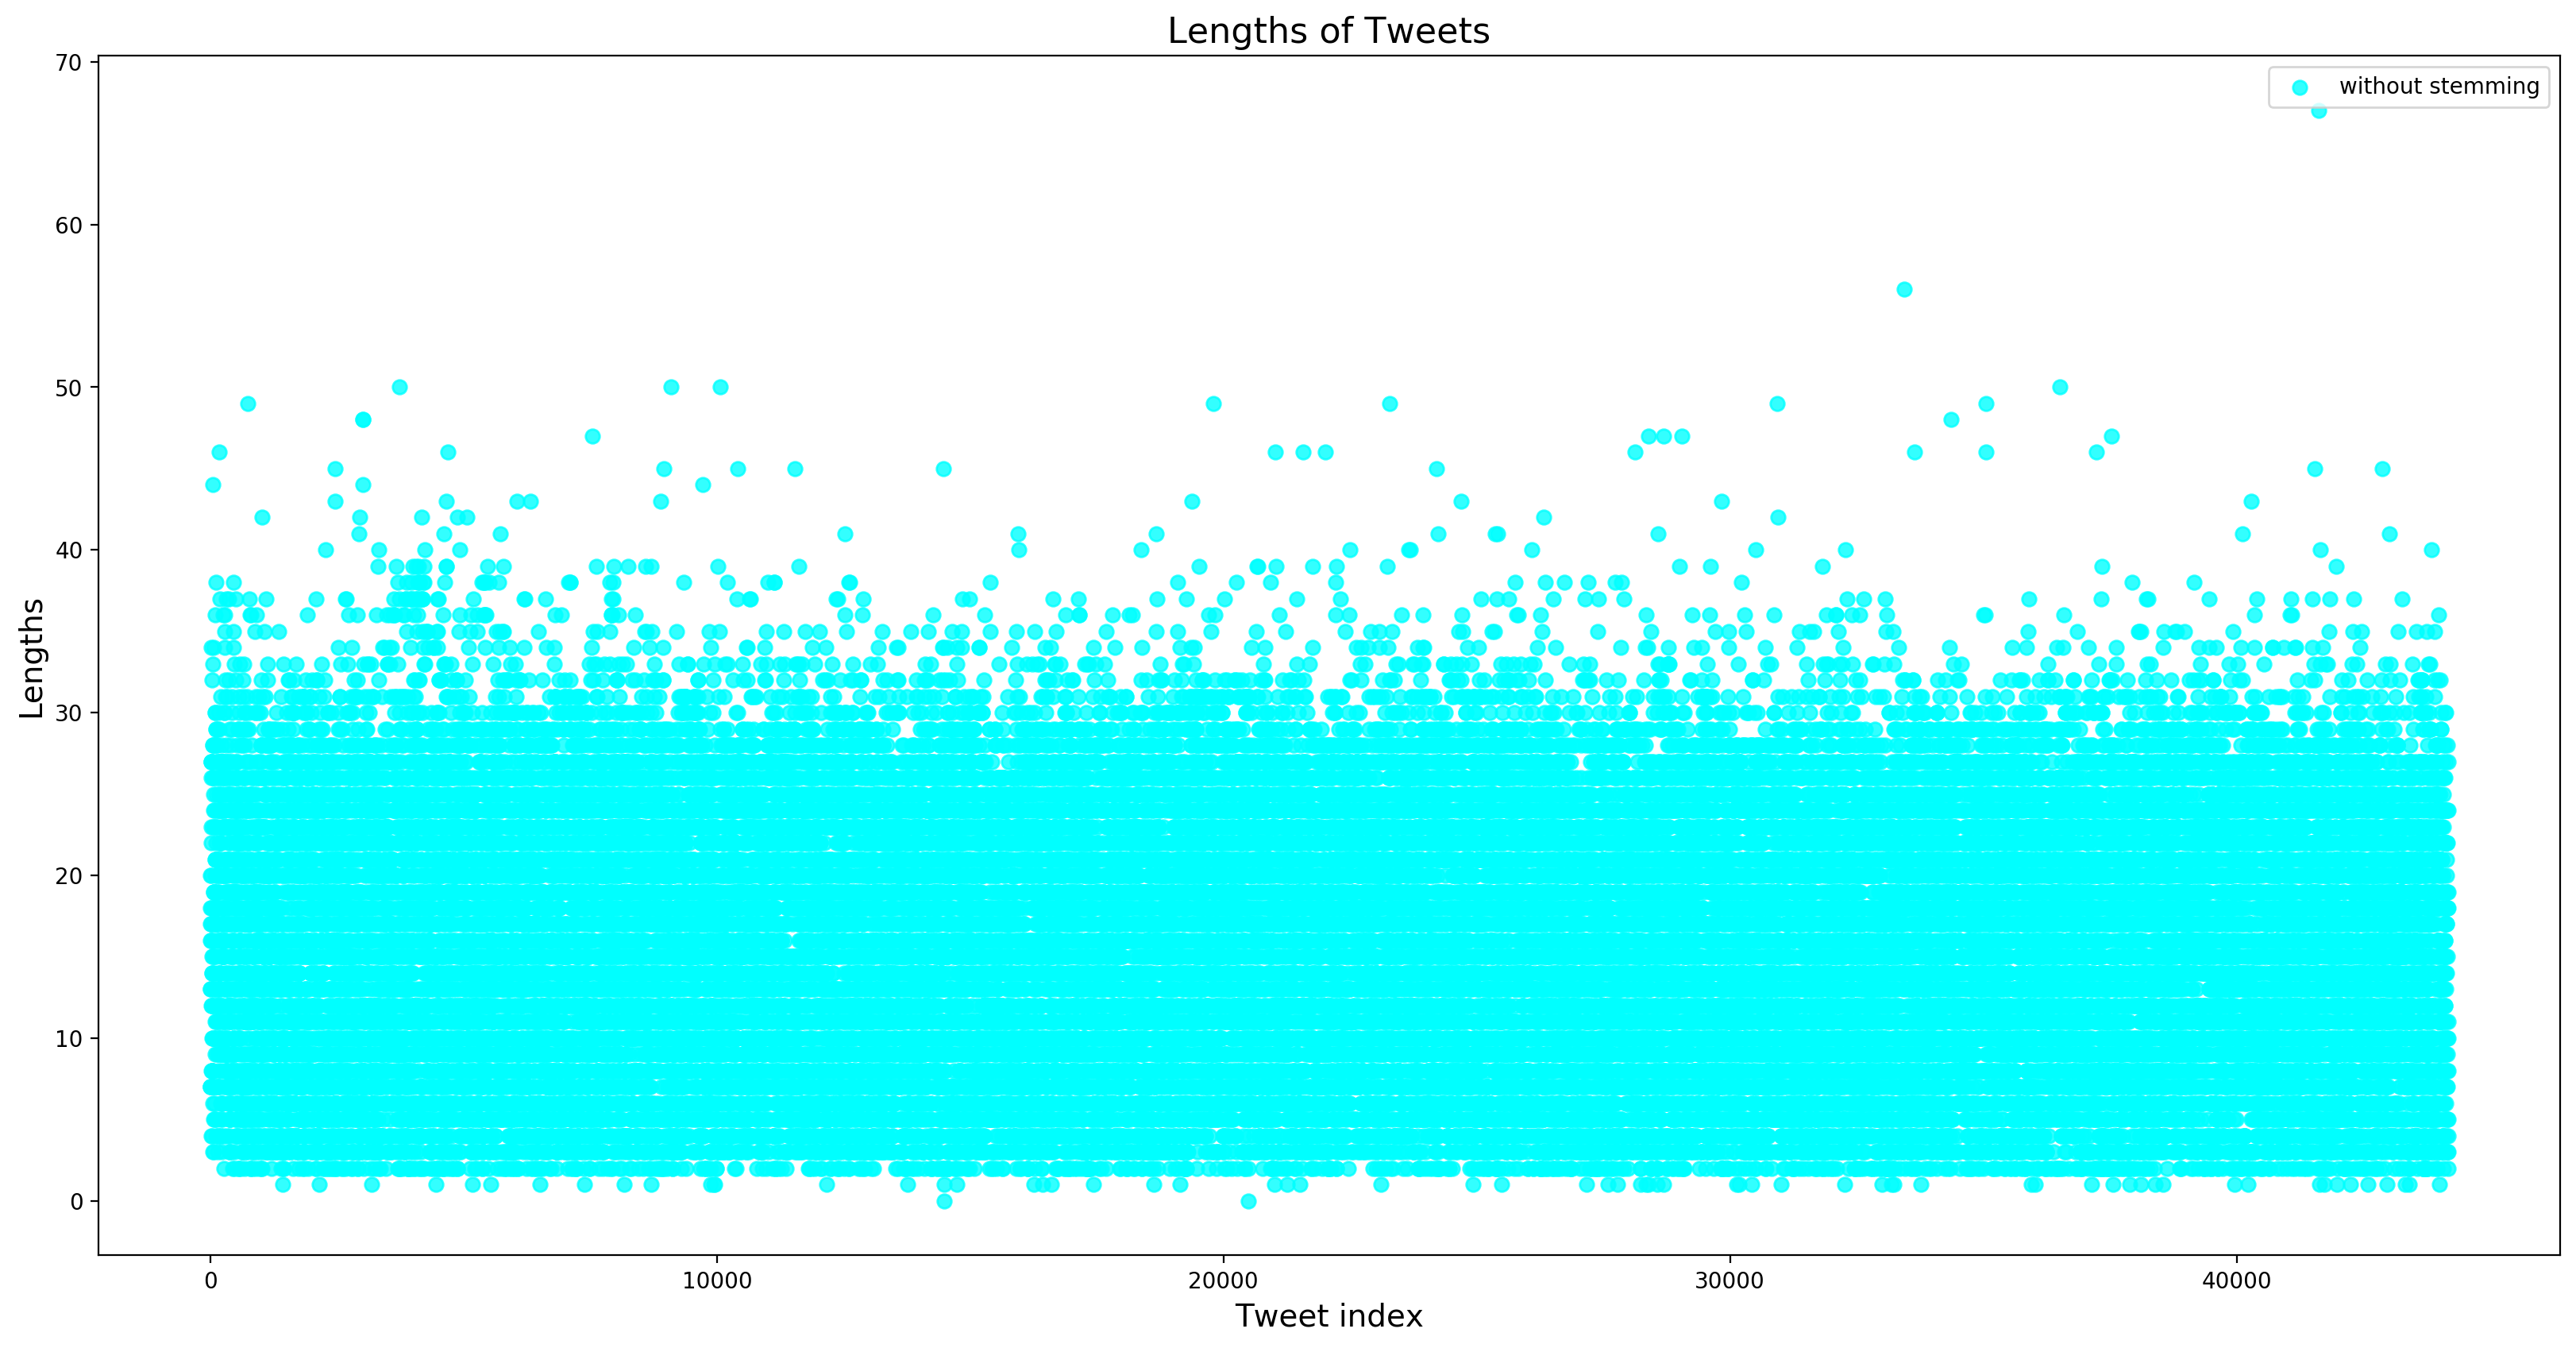

In [25]:
plt.figure(figsize=(20,10),dpi=200)
plt.title('Lengths of Tweets',fontsize=16)
plt.xlabel('Tweet index',fontsize=14)
plt.ylabel('Lengths',fontsize=14)
plt.scatter(raw_data.index,lengths,c='cyan',s=40,label='without stemming',alpha=0.8)
plt.legend()
plt.show()

In [26]:
flat_list=[word for item in clean_words for word in item] # flat list of words

In [27]:
words_dt=pd.Series(flat_list)

In [28]:
frequent_words=words_dt[:3000]

In [29]:
words_dt.shape

(701795,)

In [30]:
frequent_words.shape

(3000,)

In [31]:
def generate_wordcloud(words): # accepts a flat list of words
    """
    Generates word cloud includes most frequent 3000 words.
    
    """
    wc=WordCloud(max_words=3000,background_color='white',colormap='Reds',random_state=10)
    words_str=' '.join(words)
    wc.generate(words_str)
    plt.figure(figsize=(25,10))
    plt.imshow(wc,interpolation='gaussian')
    plt.axis('off')
    plt.show()    

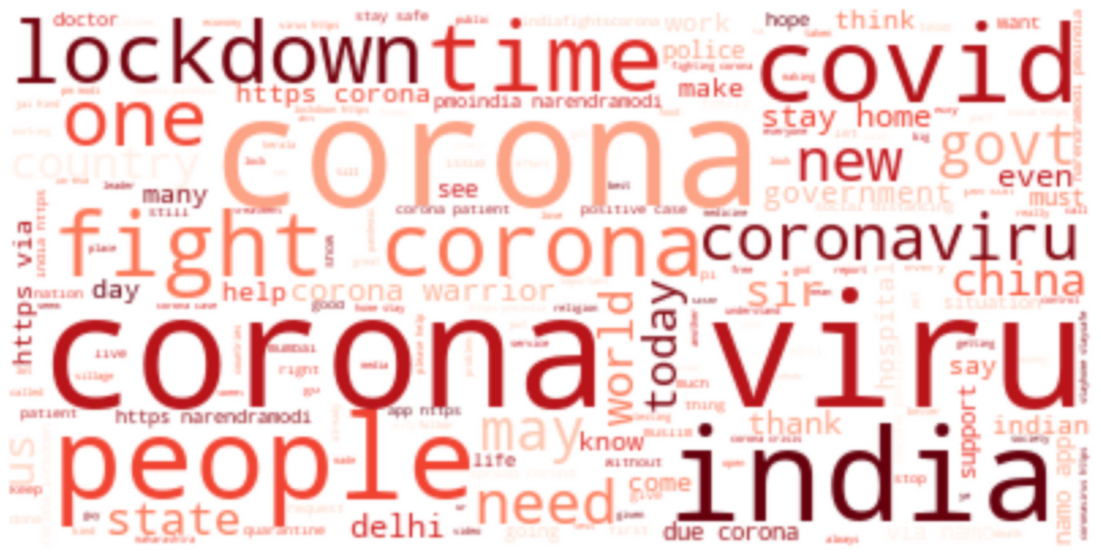

In [32]:
generate_wordcloud(flat_list)

In [33]:
def generate_wordcloud_skull(words,PATH): # accepts a flat list of words
    """
    Generates word cloud of skull shape which contains most frequent 3000 words.
    
    """
    skull=Image.open(PATH)
    new=Image.new(mode='RGB', size=skull.size, color=(255, 255, 255))
    new.paste(skull, box=skull)
    rgb_array = np.array(new)
    wc=WordCloud(mask=rgb_array,max_words=3000,background_color='white',colormap='Reds',random_state=10)
    words_str=' '.join(words)
    wc.generate(words_str)
    plt.figure(figsize=(20,10))
    plt.imshow(wc,interpolation='gaussian')
    plt.axis('off')
    plt.show()    

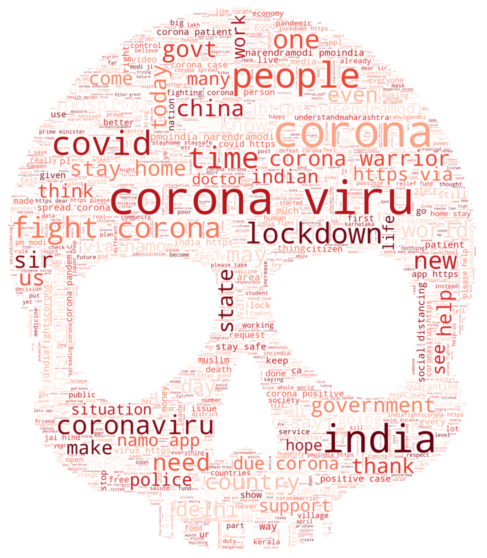

In [34]:
generate_wordcloud_skull(flat_list,SKULL_IMAGE_PATH)

## Analysis According to Hashtag Count 

In [35]:
hashtag_data=pd.DataFrame(raw_data.hashtags.value_counts(ascending=False))

In [36]:
hashtag_data.head(20)

,hashtags
Corona,419
IndiaFightsCorona,359
COVID19,296
corona,222
COVID,175
coronavirus,166
COVID„Éº19,164
GSTFreeCorona,118
OndrinaivomVaa,89
CoronaRisk_ReleaseAsaramBapuji,81


In [37]:
total_hashtag=np.sum(hashtag_data.values)

In [38]:
hashtag_data['Probability Of Occurence Of Hashtag']=np.around(hashtag_data['hashtags']/total_hashtag,4)

In [39]:
hashtag_data['Relative Occurence w.r.t Most Popular Tag']=np.around(hashtag_data['hashtags']/raw_data.hashtags.value_counts()[0],3)

In [40]:
hashtag_data['Popularity Tag']='No Tag'

In [41]:
def popular_tag(data):
    """
    DataFrame must have a column Hashtags.
    Returns a popularity tag.
    
    """
    m=data.shape[0]
    for i in range(m):
        val=data['hashtags'].values[i]

        if val>=200:
            data['Popularity Tag'][i]="Most Trending"
        elif val>=75 and val<200:
            data['Popularity Tag'][i]="Intermediately Trending"
        elif val<75:
            data['Popularity Tag'][i]="Least Trending"
    return data

In [42]:
hashtag_data=popular_tag(hashtag_data)

In [43]:
hashtag_data.tail(5)

,hashtags,Probability Of Occurence Of Hashtag,Relative Occurence w.r.t Most Popular Tag,Popularity Tag
AhmedabadFightsCorona coronavirusinindia Ahmedabad,1,0.0001,0.002,Least Trending
Who_Is_RealGod CoronaUpdate,1,0.0001,0.002,Least Trending
BanTablighiJamat DelhiCoronaScareExplodes,1,0.0001,0.002,Least Trending
Corona ChineseVirus19 coronaupdatesindia,1,0.0001,0.002,Least Trending
LathiCharge covid COVID2019 RajasthanLockDown corona,1,0.0001,0.002,Least Trending


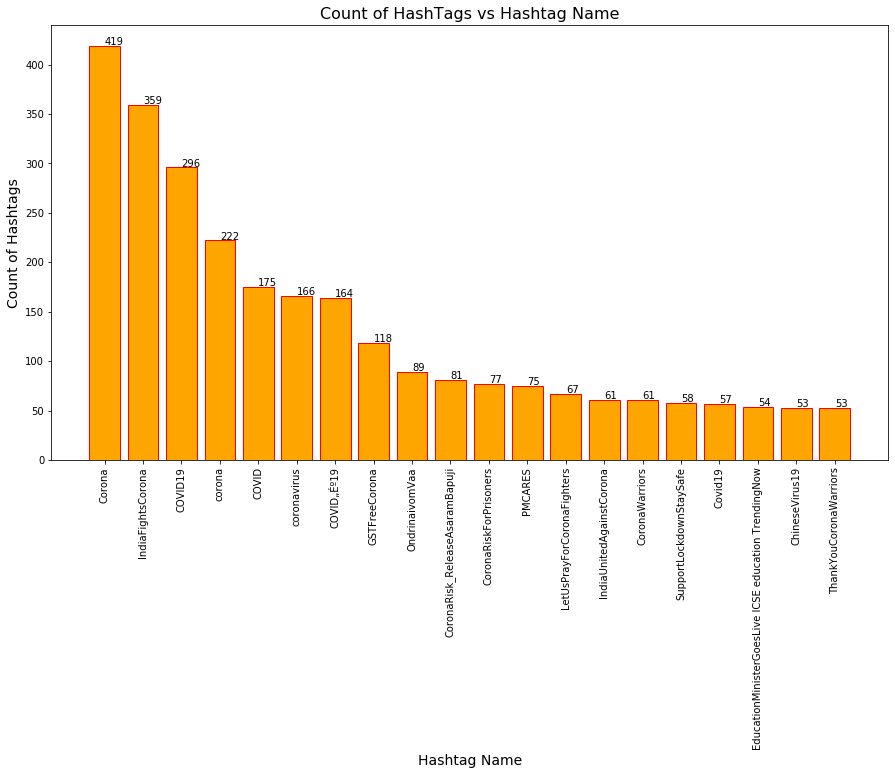

In [44]:
plt.figure(figsize=(15,8))
plt.bar(hashtag_data.index[:20],hashtag_data.hashtags[:20],color='orange',edgecolor='red')
plt.xticks(rotation=90)
plt.title("Count of HashTags vs Hashtag Name",fontsize=16)
plt.xlabel("Hashtag Name", fontsize=14)
plt.ylabel("Count of Hashtags",fontsize=14)
for index, value in enumerate(hashtag_data.hashtags[:20]):
    plt.text(index,value+1,str(value))
plt.show()

## Hashtag Popularity Using Re-Tweet Count

In [45]:
raw_data.columns

Index(['created_at', 'hashtags', 'favorite_count', 'id', 'lang', 'place',
       'retweet_count', 'text', 'tweet_url', 'user_screen_name',
       'user_description', 'user_favourites_count', 'user_followers_count',
       'user_friends_count', 'user_listed_count', 'user_location', 'user_name',
       'user_screen_name.1', 'user_statuses_count'],
      dtype='object')

In [46]:
  raw_data['user_name'].value_counts()

Journalist Siraj Noorani    116
Sidhant Sibal               106
‡§∏‡§®‡•Ä                    98
Bhushan Mahajan              84
raj                          81
                           ... 
Shivanna G                    1
davki nandan doriya           1
VIPIN KUMAR                   1
Akula Venkatesh               1
Bitu Rauth                    1
Name: user_name, Length: 21626, dtype: int64

In [47]:
raw_data.head(5)

,created_at,hashtags,favorite_count,id,lang,place,retweet_count,text,tweet_url,user_screen_name,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count
0,Wed Mar 25 06:20:02 +0000 2020,NaN,0,1242697733175220000,en,"Pune, India",0,Meditation and mindfulness tips for coping wit...,https://twitter.com/ShalomFloat/status/1242697...,ShalomFloat,Shalom float spa is the first dedicated float ...,252,382,97,24,India,Shalom Float Spa,ShalomFloat,1770
1,Wed Mar 25 06:36:25 +0000 2020,NaN,0,1242701857253980000,en,"Gandhinagar, India",0,Contribute to INDIA FIGHTS CORONA @ Gandhinaga...,https://twitter.com/prakashkalal/status/124270...,prakashkalal,NaN,693,175,107,0,"Gandhinagar, India",prks7,prakashkalal,73
2,Wed Mar 25 06:18:32 +0000 2020,NaN,0,1242697356249880000,en,"Bidhan Nagar, India",0,@DelhiPolice @DCPEastDelhi @msisodia @AamAadmi...,https://twitter.com/Bhartendulkar/status/12426...,Bhartendulkar,Senior Media Analyst @Indianpac | Ex Sr Report...,5273,609,2239,7,"Kolkata, India",Bhartendu Sharma,Bhartendulkar,6002
3,Wed Mar 25 06:05:46 +0000 2020,SSC_UFM_MAT_KARONA Corona UFM,9,1242694142242650000,en,"Maharashtra, India",19,#SSC_UFM_MAT_KARONA\n#Corona is slow poison #U...,https://twitter.com/patilkiii/status/124269414...,patilkiii,"Ab khushi de ke aazma le khuda, In ghamon se t...",1744,259,786,0,"Pune, India",ùï¨ùñáùñçùñéùñëùñÜùñòùñç ùïæùñöùñì...,patilkiii,1387
4,Wed Mar 25 06:31:10 +0000 2020,Corona pritamkumarmurari Voice,0,1242700536752700000,en,"Bokaro Steel City, India",0,https://t.co/P7eQiq8tFa Mata Di \nDoston ise #...,https://twitter.com/SINGERMurariPa1/status/124...,SINGERMurariPa1,"Singing,Dancing,Acting,Entertainment",4,2,163,0,‡§¨‡•ã‡§ï‡§æ‡§∞‡•ã ‡§∏‡•ç‡§ü‡•Ä‡§≤ ‡§∏‡§ø‡§ü‡•...,SINGER=Murari Pathak,SINGERMurariPa1,13


In [48]:
new_data=raw_data[["created_at","user_name","retweet_count","user_favourites_count","user_followers_count","user_friends_count","user_listed_count","user_statuses_count"]]

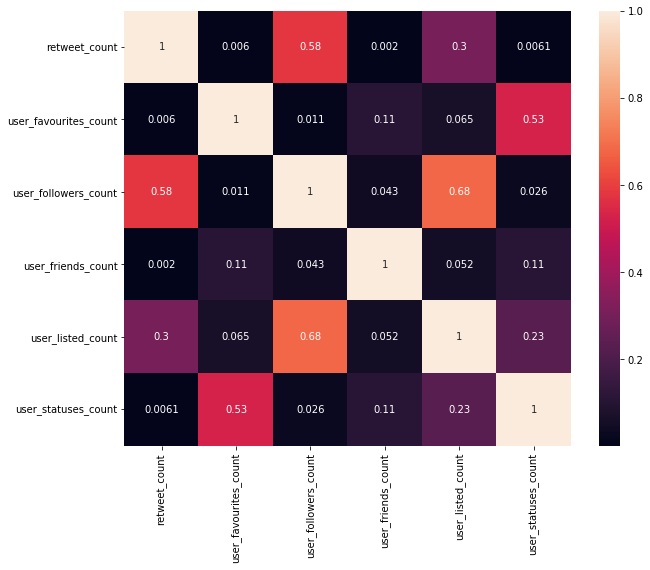

In [49]:
plt.figure(figsize=(10,8))
sns.heatmap(new_data.corr(),annot=True)
plt.show()

In [50]:
from datetime import datetime

In [51]:
x=raw_data.copy()

In [52]:
x.created_at=pd.to_datetime(raw_data.created_at)

In [53]:
y=x[["hashtags","retweet_count","user_followers_count"]]

In [54]:
y

,hashtags,retweet_count,user_followers_count
0,NaN,0,382
1,NaN,0,175
2,NaN,0,609
3,SSC_UFM_MAT_KARONA Corona UFM,19,259
4,Corona pritamkumarmurari Voice,0,2
...,...,...,...
44174,HardAreaAllowance HCWs Corona Doctors Covid Ha...,7,3241
44175,NaN,0,21
44176,NaN,1,1937
44177,NaN,0,1033


In [55]:
y=x.groupby("hashtags")

In [56]:
df=pd.DataFrame(y.retweet_count.sum())

In [57]:
df=df.sort_values('retweet_count',ascending=False).head(20)

In [58]:
df

,retweet_count
hashtags,
COVID19 Corona StayHomeIndia,22552
BeatTheVirus COVID19 CoronaRelief,3820
Corona,2874
BREAKING CoronaVirus,1830
BREAKING,1691
COVID,1159
GSTFreeCorona,889
CoronaRisk_ReleaseAsaramBapuji,760
Telangana AndhraPradesh Kerala Corona StayHomeStaySafe IndiaFightsCorona,730


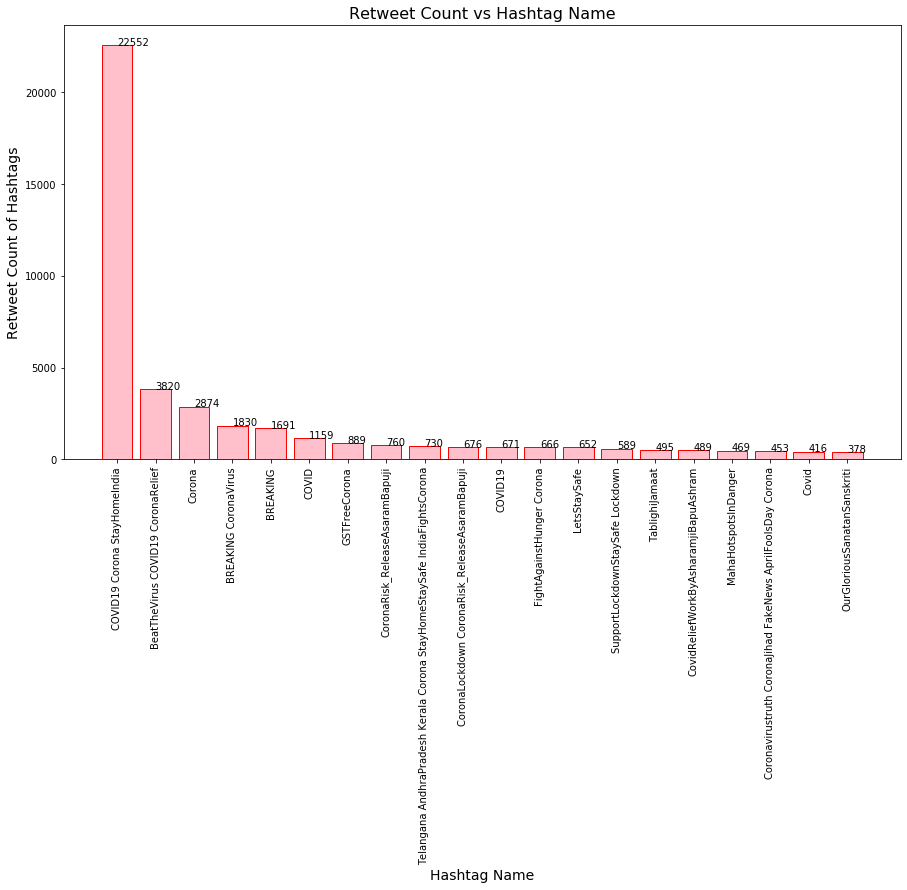

In [59]:
plt.figure(figsize=(15,8))
plt.bar(df.index,df.retweet_count,color='pink',edgecolor='red')
plt.xticks(rotation=90)
plt.title("Retweet Count vs Hashtag Name",fontsize=16)
plt.xlabel("Hashtag Name", fontsize=14)
plt.ylabel("Retweet Count of Hashtags",fontsize=14)
for index, value in enumerate(df.retweet_count):
    plt.text(index,value+5,str(value))
plt.show()

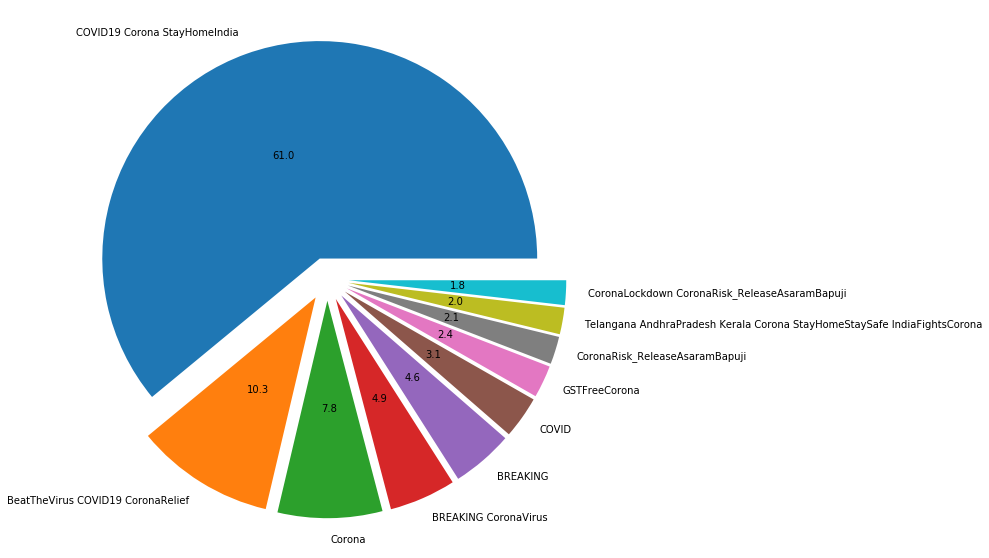

In [60]:
# Plot of Top 10 According to above Analysis
plt.figure(figsize=(15,10))
plt.pie(x=df.retweet_count[:10],labels=df.index[:10],autopct='%.1f',pctdistance=0.5,explode=[0.1]*10)
plt.show()

In [61]:
df.to_csv("Retweet_Count.csv")

In [62]:
z=x.groupby("user_name")

## Analysis for Finding Most Active User

In [63]:
data=pd.read_csv('tweets.csv')
data.head()
del data['day']
ascending=data.copy()
data['created_at'] = pd.to_datetime(data['created_at'])
ascending['created_at'] = pd.to_datetime(ascending['created_at'])
ascending.sort_values(by='created_at')

,user_screen_name,created_at
51,workforprofits,2020-03-25 06:02:40+00:00
63,hope_india2014,2020-03-25 06:02:50+00:00
77,mbjcustoms,2020-03-25 06:03:31+00:00
56,Avanish86257344,2020-03-25 06:03:39+00:00
54,SzNarayanpet,2020-03-25 06:03:56+00:00
...,...,...
44112,snehanshus,2020-05-07 03:47:24+00:00
44086,zubinkapadia,2020-05-07 03:47:39+00:00
44176,Bikram_Odisha,2020-05-07 03:47:42+00:00
44177,liyer,2020-05-07 03:48:04+00:00


In [64]:
ascending.sort_values(by='created_at',inplace=True)
ascending.to_csv('ascending.csv')
descending=data.copy()
descending['created_at'] = pd.to_datetime(descending['created_at'])
descending.sort_values(by='created_at',ascending=False,inplace=True)
descending.to_csv('descending.csv')

In [65]:
data=pd.read_csv('final_tweet_data.csv')
data.head()

,user_screen_name,Number Of Tweets,First Tweet Date,Last Tweet Date
0,sirajnoorani,116,2020-04-15 10:37:33+00:00,2020-05-06 19:25:02+00:00
1,sidhant,106,2020-03-25 09:49:31+00:00,2020-05-06 13:09:07+00:00
2,spsurana90,98,2020-05-01 12:00:46+00:00,2020-05-05 07:47:14+00:00
3,mahajan1bhushan,84,2020-03-26 01:17:11+00:00,2020-05-06 10:49:40+00:00
4,raj2jas,81,2020-03-25 14:31:58+00:00,2020-05-06 06:27:28+00:00


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22447 entries, 0 to 22446
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_screen_name  22447 non-null  object
 1   Number Of Tweets  22447 non-null  int64 
 2   First Tweet Date  22447 non-null  object
 3   Last Tweet Date   22447 non-null  object
dtypes: int64(1), object(3)
memory usage: 701.6+ KB


In [67]:
data['First Tweet Date'] = pd.to_datetime(data['First Tweet Date'])
data['Last Tweet Date'] = pd.to_datetime(data['Last Tweet Date'])
data['Days']=data['Last Tweet Date']-data['First Tweet Date']
data.head()

,user_screen_name,Number Of Tweets,First Tweet Date,Last Tweet Date,Days
0,sirajnoorani,116,2020-04-15 10:37:33+00:00,2020-05-06 19:25:02+00:00,21 days 08:47:29
1,sidhant,106,2020-03-25 09:49:31+00:00,2020-05-06 13:09:07+00:00,42 days 03:19:36
2,spsurana90,98,2020-05-01 12:00:46+00:00,2020-05-05 07:47:14+00:00,3 days 19:46:28
3,mahajan1bhushan,84,2020-03-26 01:17:11+00:00,2020-05-06 10:49:40+00:00,41 days 09:32:29
4,raj2jas,81,2020-03-25 14:31:58+00:00,2020-05-06 06:27:28+00:00,41 days 15:55:30


In [68]:
data['Seconds']=(data['Days'].dt.total_seconds())

In [69]:
data.head()

,user_screen_name,Number Of Tweets,First Tweet Date,Last Tweet Date,Days,Seconds
0,sirajnoorani,116,2020-04-15 10:37:33+00:00,2020-05-06 19:25:02+00:00,21 days 08:47:29,1846049.0
1,sidhant,106,2020-03-25 09:49:31+00:00,2020-05-06 13:09:07+00:00,42 days 03:19:36,3640776.0
2,spsurana90,98,2020-05-01 12:00:46+00:00,2020-05-05 07:47:14+00:00,3 days 19:46:28,330388.0
3,mahajan1bhushan,84,2020-03-26 01:17:11+00:00,2020-05-06 10:49:40+00:00,41 days 09:32:29,3576749.0
4,raj2jas,81,2020-03-25 14:31:58+00:00,2020-05-06 06:27:28+00:00,41 days 15:55:30,3599730.0


In [70]:
data['avg_tweet_time']=data['Seconds']/data['Number Of Tweets']
filter_data=data.copy()
filter_data=filter_data[filter_data['Number Of Tweets']>10]
filter_data.sort_values(by='avg_tweet_time')
filter_data.sort_values(by='avg_tweet_time',inplace=True)
filter_data.head(10)

,user_screen_name,Number Of Tweets,First Tweet Date,Last Tweet Date,Days,Seconds,avg_tweet_time
325,SanjaysinhGoh17,12,2020-03-27 08:46:55+00:00,2020-03-27 08:49:05+00:00,00:02:10,130.0,10.833333
228,Narisesomeswara,14,2020-03-25 09:32:11+00:00,2020-03-25 09:36:11+00:00,00:04:00,240.0,17.142857
130,BJPrajeshmishra,20,2020-05-06 07:53:27+00:00,2020-05-06 07:59:24+00:00,00:05:57,357.0,17.850000
115,c_priyadarshi,21,2020-04-14 05:27:26+00:00,2020-04-14 05:34:56+00:00,00:07:30,450.0,21.428571
235,AjayGupta6774,14,2020-03-25 15:20:51+00:00,2020-03-25 15:28:09+00:00,00:07:18,438.0,31.285714
202,varoonagrawal,16,2020-03-28 19:49:29+00:00,2020-03-28 20:05:41+00:00,00:16:12,972.0,60.750000
101,immiiAsh,22,2020-03-26 19:56:11+00:00,2020-03-26 20:20:51+00:00,00:24:40,1480.0,67.272727
253,Ramakan35236434,14,2020-03-29 09:25:26+00:00,2020-03-29 09:52:01+00:00,00:26:35,1595.0,113.928571
59,SahayNitish,30,2020-03-31 03:33:04+00:00,2020-03-31 05:30:01+00:00,01:56:57,7017.0,233.900000
13,sudheerakki175,56,2020-03-28 13:05:37+00:00,2020-03-28 18:16:07+00:00,05:10:30,18630.0,332.678571


In [71]:
filter_data.shape

(399, 7)

In [72]:
filter_data.rename(columns={'avg_tweet_time': 'avg_tweet_time(s)'})

,user_screen_name,Number Of Tweets,First Tweet Date,Last Tweet Date,Days,Seconds,avg_tweet_time(s)
325,SanjaysinhGoh17,12,2020-03-27 08:46:55+00:00,2020-03-27 08:49:05+00:00,0 days 00:02:10,130.0,10.833333
228,Narisesomeswara,14,2020-03-25 09:32:11+00:00,2020-03-25 09:36:11+00:00,0 days 00:04:00,240.0,17.142857
130,BJPrajeshmishra,20,2020-05-06 07:53:27+00:00,2020-05-06 07:59:24+00:00,0 days 00:05:57,357.0,17.850000
115,c_priyadarshi,21,2020-04-14 05:27:26+00:00,2020-04-14 05:34:56+00:00,0 days 00:07:30,450.0,21.428571
235,AjayGupta6774,14,2020-03-25 15:20:51+00:00,2020-03-25 15:28:09+00:00,0 days 00:07:18,438.0,31.285714
...,...,...,...,...,...,...,...
367,Dhichkyaaon,11,2020-03-26 19:19:55+00:00,2020-05-05 21:52:02+00:00,40 days 02:32:07,3465127.0,315011.545455
372,LangaMahesh,11,2020-03-27 13:07:56+00:00,2020-05-06 15:59:15+00:00,40 days 02:51:19,3466279.0,315116.272727
360,hoonjan_191,11,2020-03-26 06:59:52+00:00,2020-05-06 07:03:07+00:00,41 days 00:03:15,3542595.0,322054.090909
347,shaileshbrahm,11,2020-03-25 08:48:23+00:00,2020-05-06 06:07:12+00:00,41 days 21:18:49,3619129.0,329011.727273


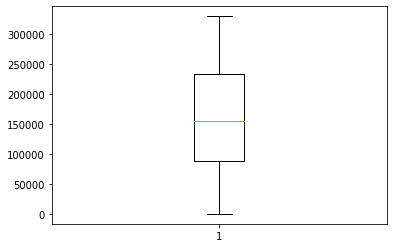

In [73]:
plt.boxplot(filter_data['avg_tweet_time'])
plt.show()

In [74]:
filter_data['First Tweet Date'] = pd.to_datetime(filter_data['First Tweet Date'])
filter_data['Last Tweet Date'] = pd.to_datetime(filter_data['Last Tweet Date'])
filter_data['Days']=filter_data['Last Tweet Date']-filter_data['First Tweet Date']
filter_data[filter_data.Days > pd.to_timedelta("18 days")]
filter_data['Avg_Tweet_Time(hrs)']=filter_data['avg_tweet_time']/3600
filter_data.sort_values(by='Avg_Tweet_Time(hrs)',inplace=True)
df=filter_data.copy()

In [75]:
df=df[df.Days > pd.to_timedelta("18 days")]
df.sort_values(by='Avg_Tweet_Time(hrs)',inplace=True)
df.head(20)

,user_screen_name,Number Of Tweets,First Tweet Date,Last Tweet Date,Days,Seconds,avg_tweet_time,Avg_Tweet_Time(hrs)
0,sirajnoorani,116,2020-04-15 10:37:33+00:00,2020-05-06 19:25:02+00:00,21 days 08:47:29,1846049.0,15914.215517,4.420615
12,RsRmsc,59,2020-04-14 12:19:11+00:00,2020-05-03 11:35:25+00:00,18 days 23:16:14,1638974.0,27779.220339,7.716450
1,sidhant,106,2020-03-25 09:49:31+00:00,2020-05-06 13:09:07+00:00,42 days 03:19:36,3640776.0,34346.943396,9.540818
21,jollymampilly,43,2020-04-18 11:06:43+00:00,2020-05-07 02:20:31+00:00,18 days 15:13:48,1610028.0,37442.511628,10.400698
3,mahajan1bhushan,84,2020-03-26 01:17:11+00:00,2020-05-06 10:49:40+00:00,41 days 09:32:29,3576749.0,42580.345238,11.827874
4,raj2jas,81,2020-03-25 14:31:58+00:00,2020-05-06 06:27:28+00:00,41 days 15:55:30,3599730.0,44441.111111,12.344753
26,56ravinder,39,2020-03-25 15:00:34+00:00,2020-04-15 04:25:10+00:00,20 days 13:24:36,1776276.0,45545.538462,12.651538
5,Amit27655077,75,2020-03-25 07:32:03+00:00,2020-05-04 20:23:17+00:00,40 days 12:51:14,3502274.0,46696.986667,12.971385
6,echitgupta,72,2020-03-28 06:18:06+00:00,2020-05-06 09:12:34+00:00,39 days 02:54:28,3380068.0,46945.388889,13.040386
18,MushtaqAnsari80,44,2020-03-25 09:50:07+00:00,2020-04-18 17:04:26+00:00,24 days 07:14:19,2099659.0,47719.522727,13.255423


In [76]:
df.to_csv('active_regular.csv')